In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load  dataset
df = pd.read_csv('diabetic_data.csv')
print(df.head())

   encounter_id  patient_nbr             race  gender      age weight   
0       2278392      8222157        Caucasian  Female   [0-10)      ?  \
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id   
0                  6                        25                    1  \
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin   
0                 1  ...          No      No                   No

Exploratory Data Analysis

In [3]:
# Inspect the dataset
print("\nDataset Information:\n")
print(df.info())


Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non

In [3]:
# Check for missing values
print("\nMissing Values:\n")
print(df.isnull().sum())


Missing Values:

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                   

In [4]:
import numpy as np

# Replace "?" with NaN
df.replace("?", np.nan, inplace=True)

In [5]:
# Check for missing values
print("\nMissing Values:\n")
print(df.isnull().sum())


Missing Values:

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                   

In [6]:
# Drop columns with a high percentage of missing values
df.drop(columns=['weight', 'payer_code', 'medical_specialty'], inplace=True)

In [7]:
# Impute remaining missing values
# For categorical features, we use the most frequent value (mode)
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)


In [8]:
# Verify that there are no more missing values
print("\nMissing Values After Imputation:\n")
print(df.isnull().sum().sum())


Missing Values After Imputation:

0


In [9]:
# Basic statistics for numerical features
print("\nBasic Statistics for Numerical Features:\n")
print(df.describe())


Basic Statistics for Numerical Features:

       encounter_id   patient_nbr  admission_type_id   
count  1.017660e+05  1.017660e+05      101766.000000  \
mean   1.652016e+08  5.433040e+07           2.024006   
std    1.026403e+08  3.869636e+07           1.445403   
min    1.252200e+04  1.350000e+02           1.000000   
25%    8.496119e+07  2.341322e+07           1.000000   
50%    1.523890e+08  4.550514e+07           1.000000   
75%    2.302709e+08  8.754595e+07           3.000000   
max    4.438672e+08  1.895026e+08           8.000000   

       discharge_disposition_id  admission_source_id  time_in_hospital   
count             101766.000000        101766.000000     101766.000000  \
mean                   3.715642             5.754437          4.395987   
std                    5.280166             4.064081          2.985108   
min                    1.000000             1.000000          1.000000   
25%                    1.000000             1.000000          2.000000   
50%     

In [10]:
# Basic statistics for categorical features
print("\nBasic Statistics for Categorical Features:\n")
print(df.describe(include=['object']))


Basic Statistics for Categorical Features:

             race  gender      age  diag_1  diag_2  diag_3 max_glu_serum   
count      101766  101766   101766  101766  101766  101766        101766  \
unique          5       3       10     716     748     789             3   
top     Caucasian  Female  [70-80)     428     276     250          Norm   
freq        78372   54708    26068    6883    7110   12978         99017   

       A1Cresult metformin repaglinide  ... citoglipton insulin   
count     101766    101766      101766  ...      101766  101766  \
unique         3         4           4  ...           1       4   
top           >8        No          No  ...          No      No   
freq       92964     81778      100227  ...      101766   47383   

       glyburide-metformin glipizide-metformin glimepiride-pioglitazone   
count               101766              101766                   101766  \
unique                   4                   2                        2   
top          

Visualizations

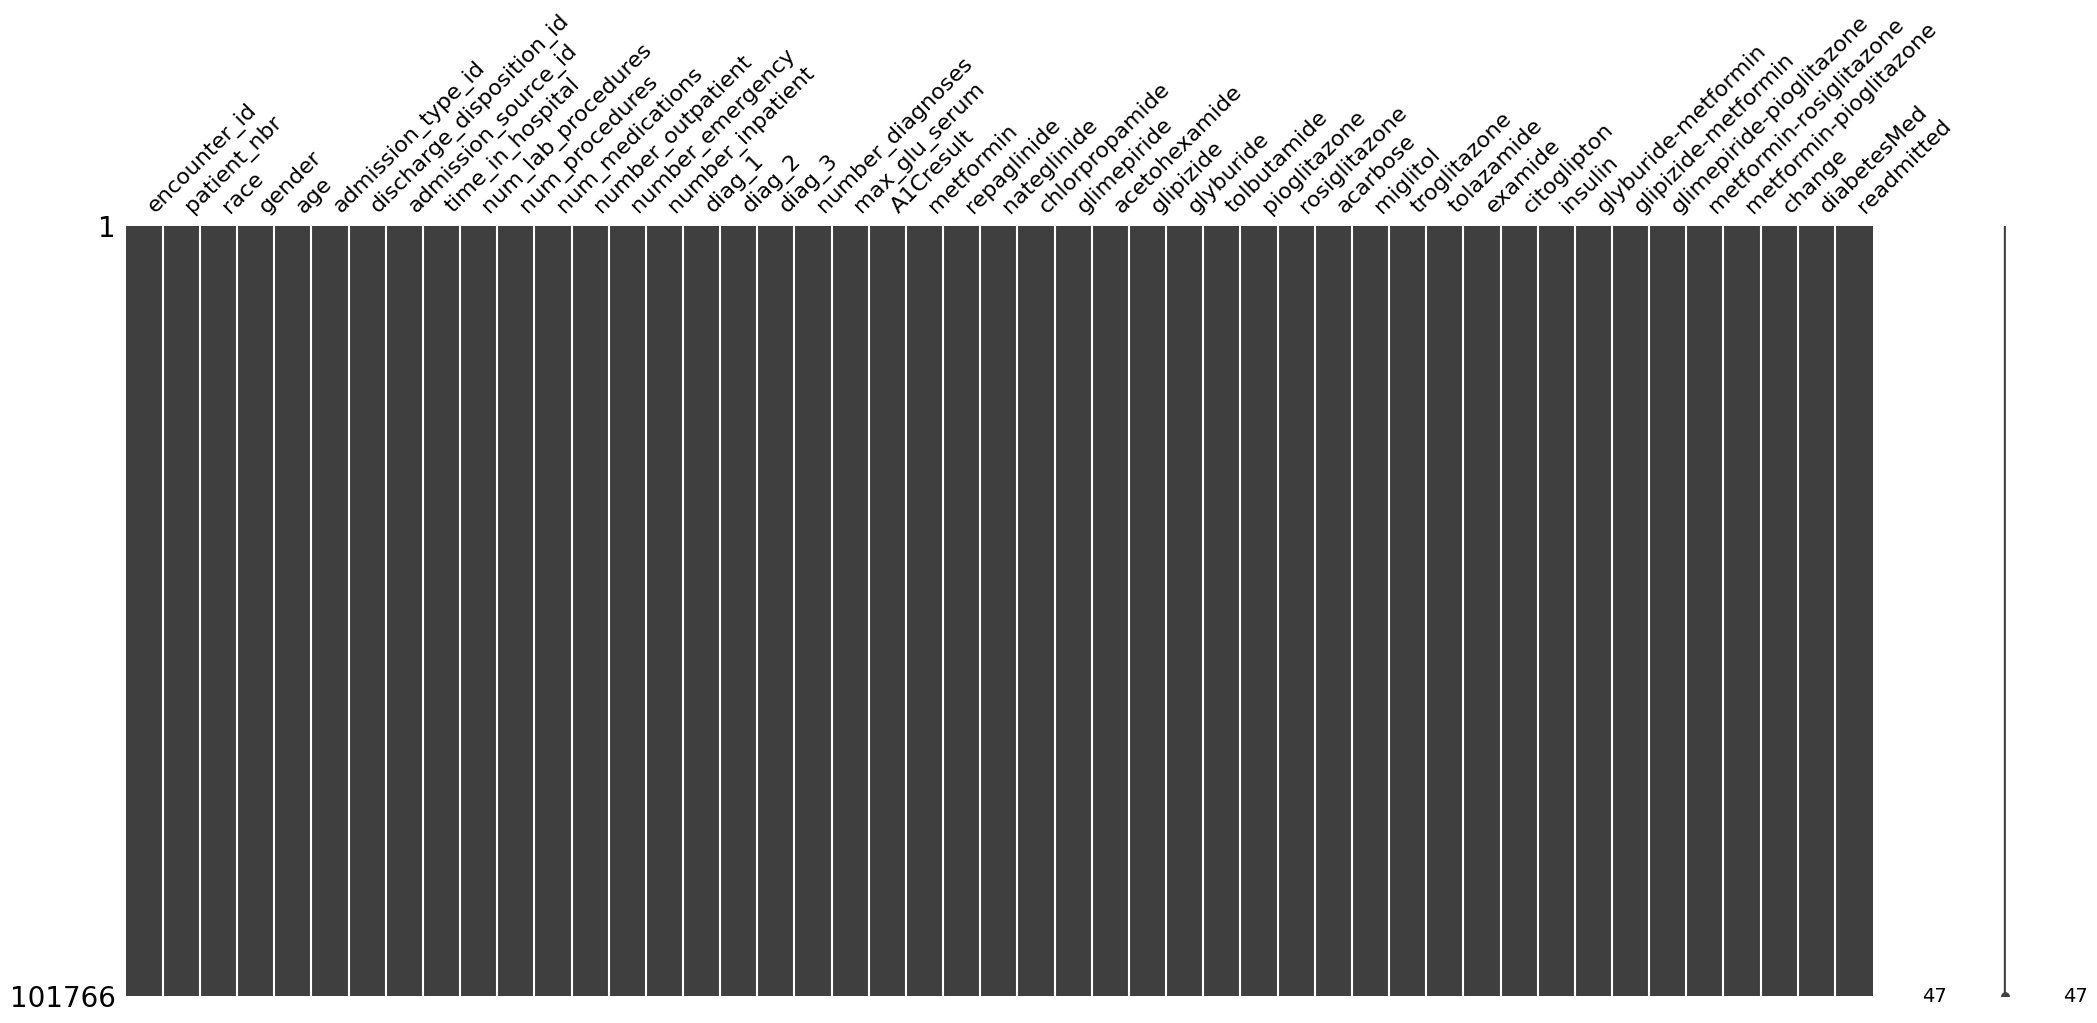

In [11]:
import missingno as msno

# Visualize missing values
msno.matrix(df)
plt.show()

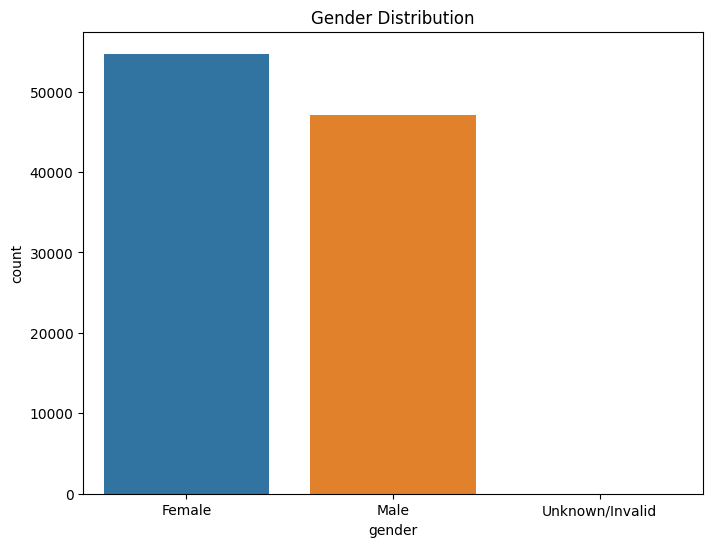

In [12]:
# Gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()

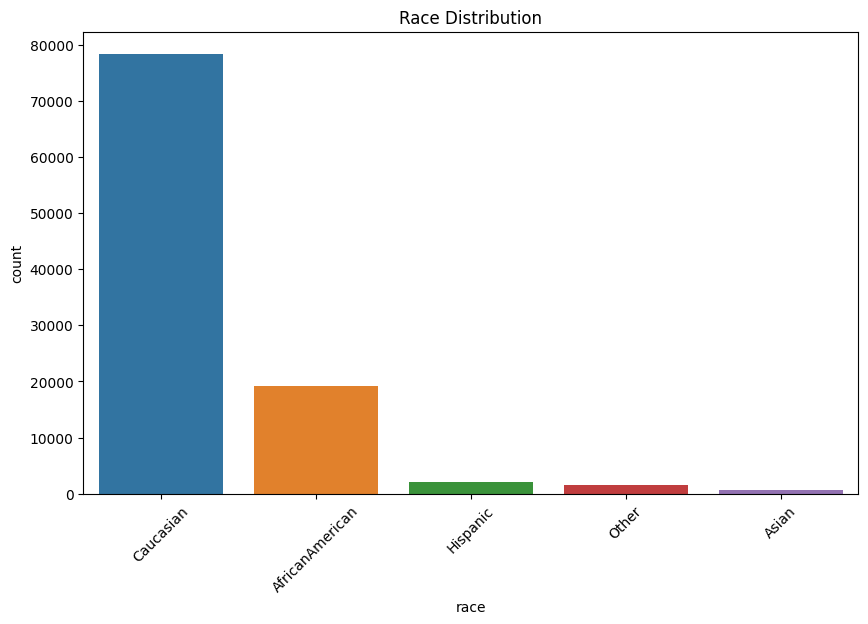

In [13]:
# Race distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='race', data=df, order=df['race'].value_counts().index)
plt.title('Race Distribution')
plt.xticks(rotation=45)
plt.show()

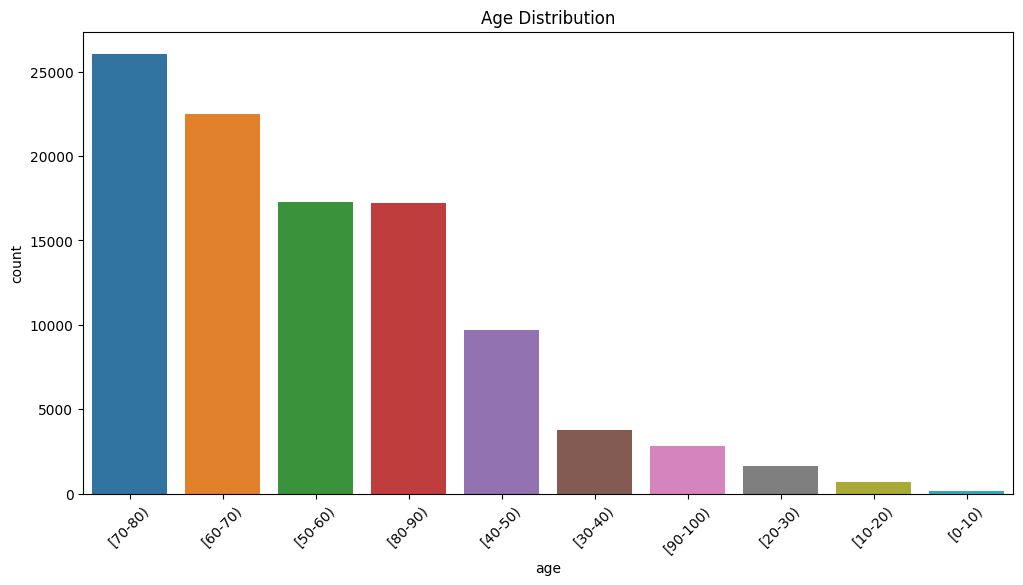

In [14]:
# Detailed analysis of 'age'
plt.figure(figsize=(12, 6))
sns.countplot(x='age', data=df, order=df['age'].value_counts().index)
plt.title('Age Distribution')
plt.xticks(rotation=45)
plt.show()


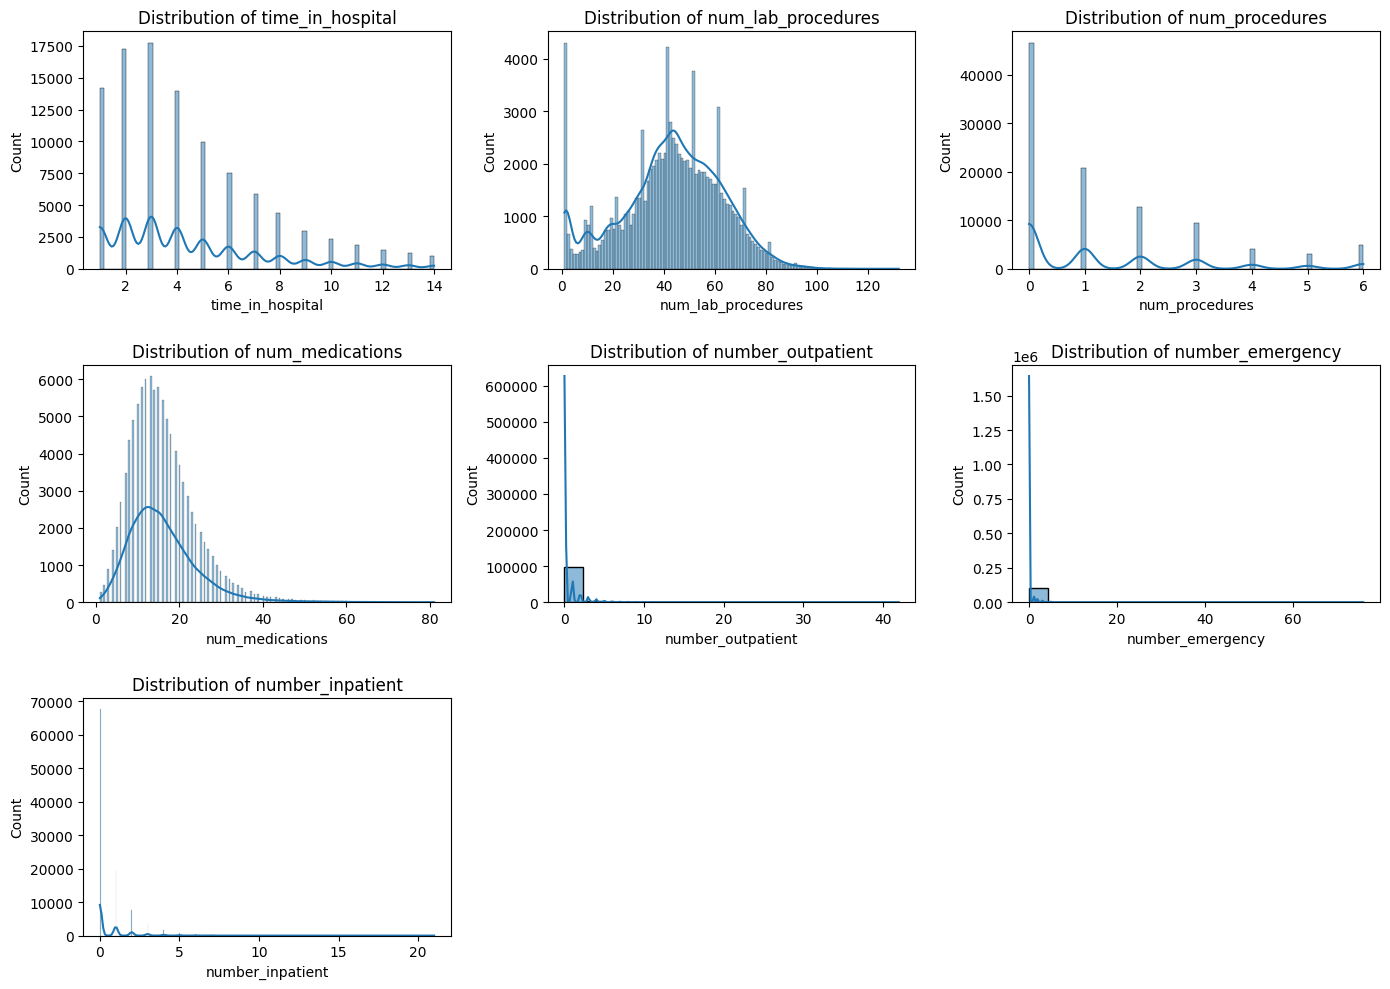

In [13]:
# Visualize distributions of key numerical features
numerical_features = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient']

plt.figure(figsize=(14, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

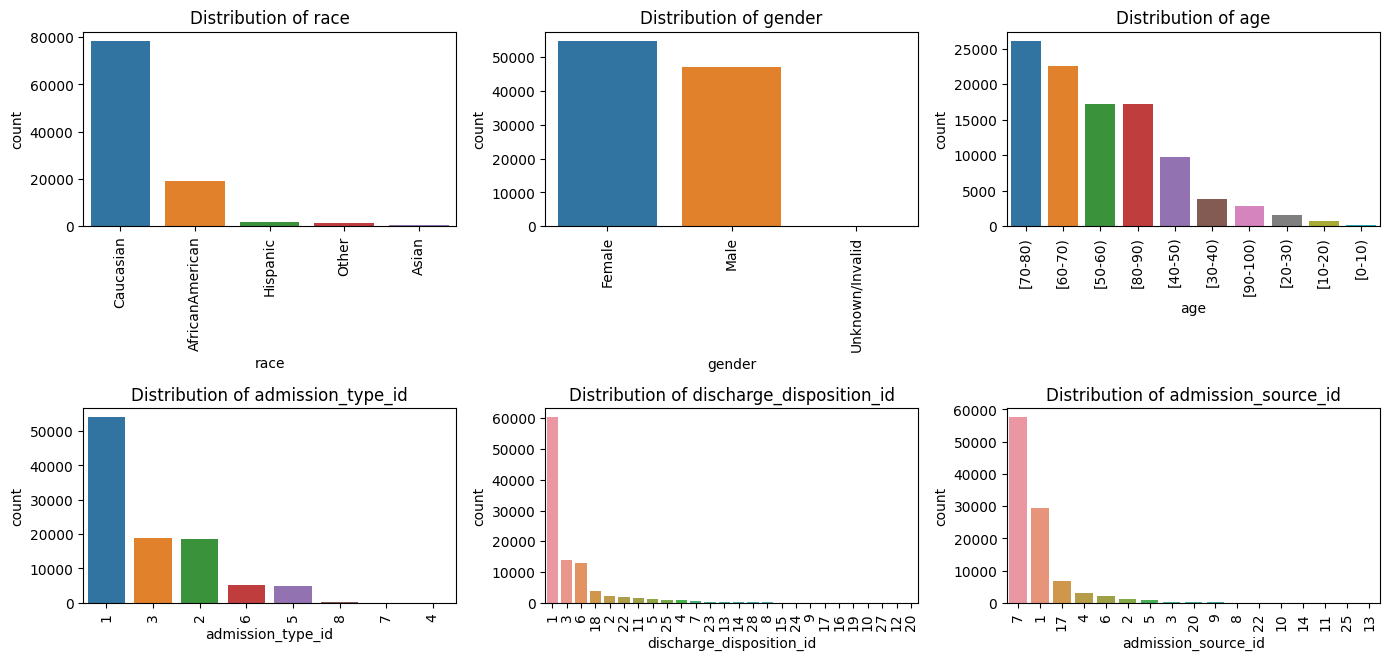

In [16]:
# Visualize the distribution of key categorical features
categorical_features = ['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id']

plt.figure(figsize=(14, 10))
for i, feature in enumerate(categorical_features):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=df, x=feature, order=df[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

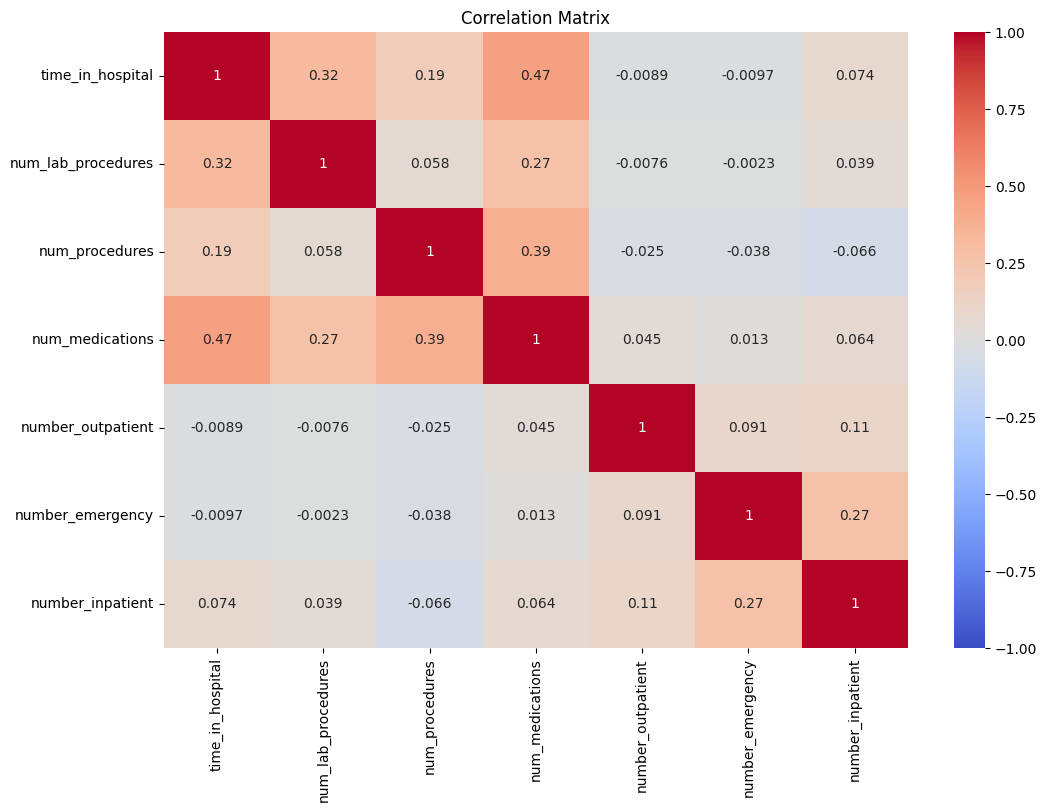

In [17]:
# Analyze correlations between numerical features
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

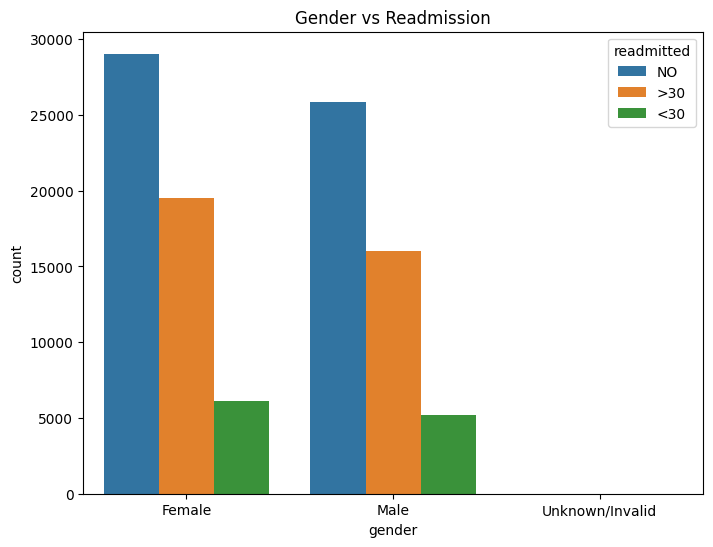

In [18]:
# Further analysis on categorical features ( gender vs readmission)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='gender', hue='readmitted')
plt.title('Gender vs Readmission')
plt.show()

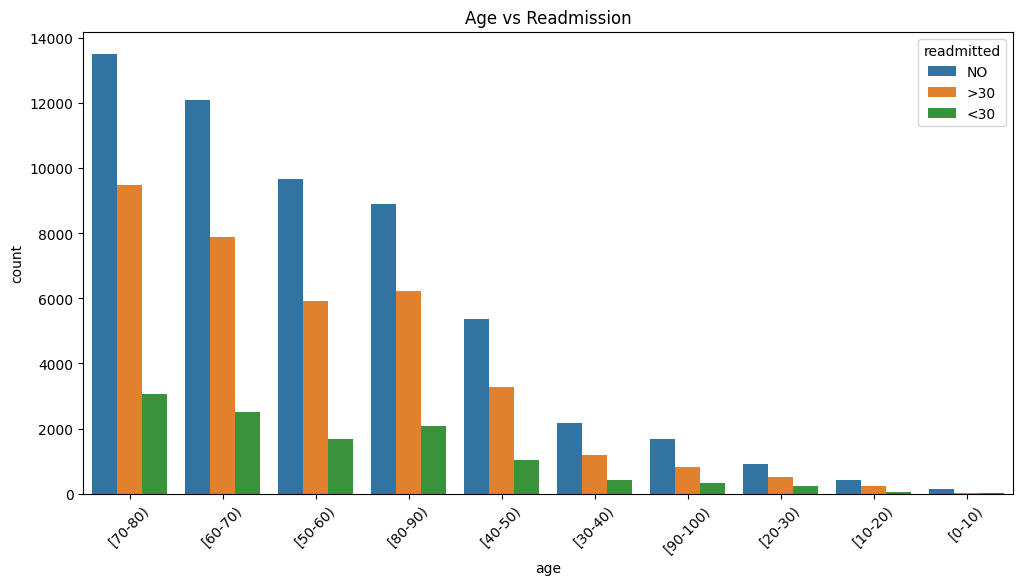

In [19]:
# Further analysis on age vs readmission
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='age', hue='readmitted', order=df['age'].value_counts().index)
plt.title('Age vs Readmission')
plt.xticks(rotation=45)
plt.show()

Feature Engineering

Creating Target Variable ( Diabetes) from the Dataset

The dataset does not have an explicit label for "diabetes diagnosis." So the presence of diabetes was infered based on certain features:

    Diagnosis Codes: the diag_1, diag_2, and diag_3 columns. Codes starting with '250' typically indicate diabetes (e.g., 250.00, 250.01).
    Diabetes Medication: Check if the patient is on diabetes medications (metformin, glimepiride, insulin, etc.).
    Lab Results: Use A1Cresult and max_glu_serum as indicators of diabetes.

By combining these factors, a binary target variable that indicates whether a patient has diabetes is created

In [10]:
# Create a diabetes target variable (as per previous instructions)
diabetes_diagnosis_codes = ['250', '250.00', '250.01', '250.02', '250.03']
def has_diabetes(row):
    return (str(row['diag_1']).startswith('250') or 
            str(row['diag_2']).startswith('250') or 
            str(row['diag_3']).startswith('250') or 
            row['A1Cresult'] in ['>7', '>8'] or 
            row['max_glu_serum'] in ['>200', '>300'] or
            row['diabetesMed'] == 'Yes')

df['diabetes'] = df.apply(has_diabetes, axis=1)

In [11]:
# Inspect the dataset
print("\nDataset Information:\n")
print(df.info())


Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 48 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   admission_type_id         101766 non-null  int64 
 6   discharge_disposition_id  101766 non-null  int64 
 7   admission_source_id       101766 non-null  int64 
 8   time_in_hospital          101766 non-null  int64 
 9   num_lab_procedures        101766 non-null  int64 
 10  num_procedures            101766 non-null  int64 
 11  num_medications           101766 non-null  int64 
 12  number_outpatient         101766 non-null  int64 
 13  number_emergency          101766 non

In [22]:
print(df.isnull().sum())

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol  

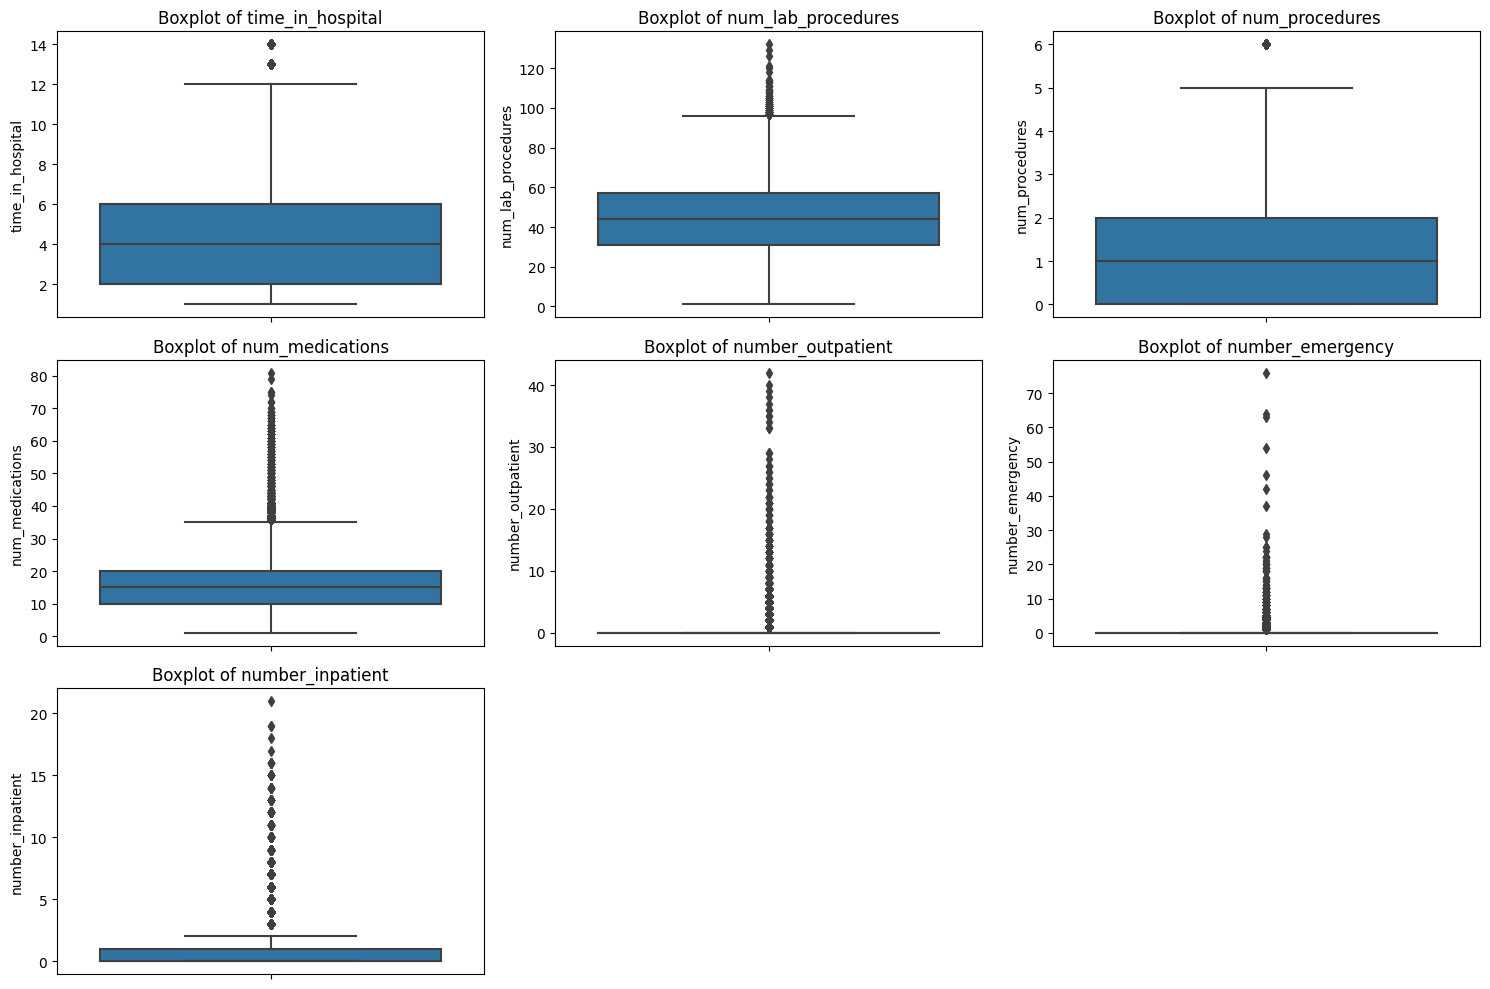

In [14]:
# Identify and visualize outliers using boxplots
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=feature, data=df)
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()


In [24]:
# Function to calculate IQR and identify outliers
def detect_outliers(feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    return outliers


In [25]:
# Detect outliers for each numerical feature
for feature in numerical_features:
    outliers = detect_outliers(feature)
    print(f"\nNumber of outliers in {feature}: {len(outliers)}")
    print(outliers[[feature]].head())


Number of outliers in time_in_hospital: 2252
     time_in_hospital
8                  13
42                 13
73                 14
114                14
135                13

Number of outliers in num_lab_procedures: 143
      num_lab_procedures
336                  103
623                   97
823                  105
830                  103
1079                  98

Number of outliers in num_procedures: 4954
     num_procedures
5                 6
120               6
147               6
155               6
221               6

Number of outliers in num_medications: 2557
     num_medications
149               39
336               61
361               40
411               46
466               41

Number of outliers in number_outpatient: 16739
     number_outpatient
2                    2
53                   1
78                   1
82                   1
128                  1

Number of outliers in number_emergency: 11383
     number_emergency
12                  1
60           

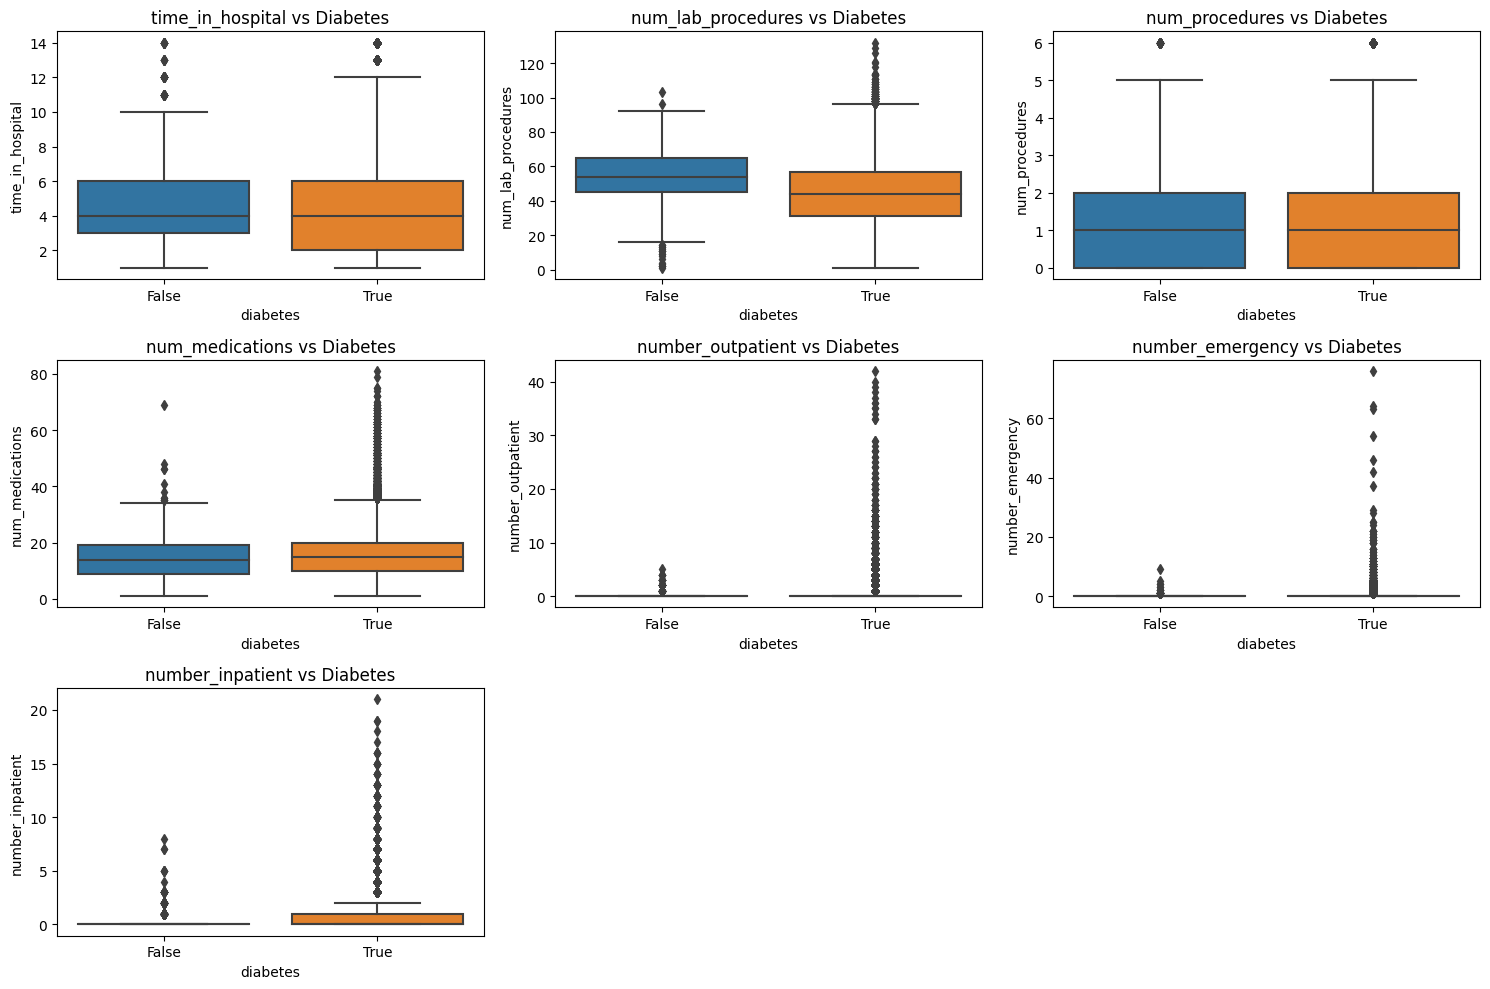

In [26]:
# Visualize numerical features with boxplots grouped by 'diabetes'
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='diabetes', y=feature, data=df)
    plt.title(f'{feature} vs Diabetes')
plt.tight_layout()
plt.show()

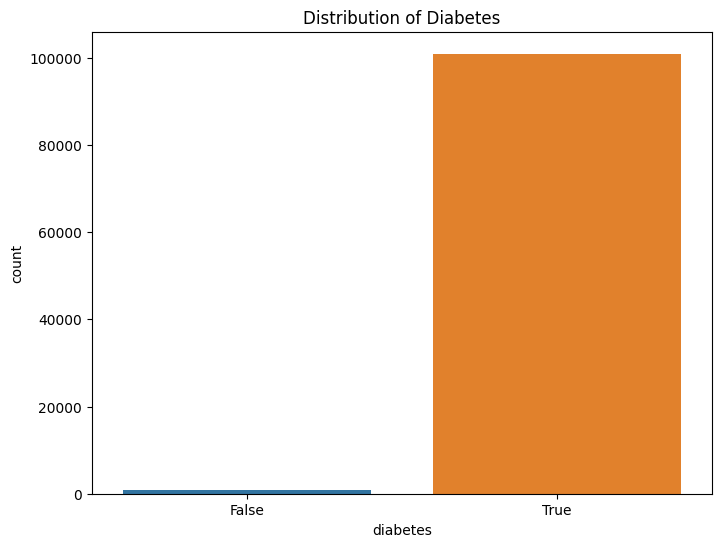

In [27]:
# Distribution of target variable (diabetes)
plt.figure(figsize=(8, 6))
sns.countplot(x='diabetes', data=df)
plt.title('Distribution of Diabetes')
plt.show()

Address Imbalance in the Dataset Using RandomOversampler

In [17]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
# Separate features and target variable
X = df.drop(columns=['diabetes'])
y = df['diabetes']

# Apply Random Oversampling to balance the dataset
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Check the class distribution after oversampling
print("Class distribution after oversampling:", Counter(y_resampled))

# Combine the resampled features and target into a new DataFrame
df_resampled = X_resampled.copy()
df_resampled['diabetes'] = y_resampled

Class distribution after oversampling: Counter({True: 100907, False: 100907})


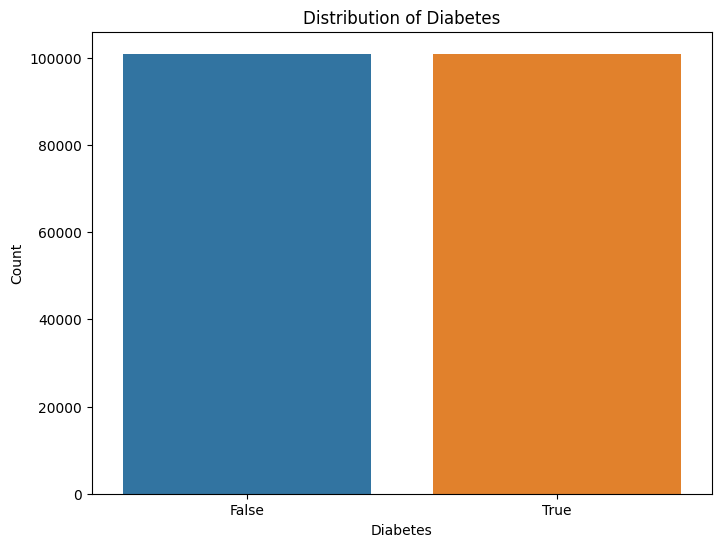

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of target variable (diabetes) after balancing
plt.figure(figsize=(8, 6))
sns.countplot(x='diabetes', data=df_resampled)
plt.title('Distribution of Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.show()


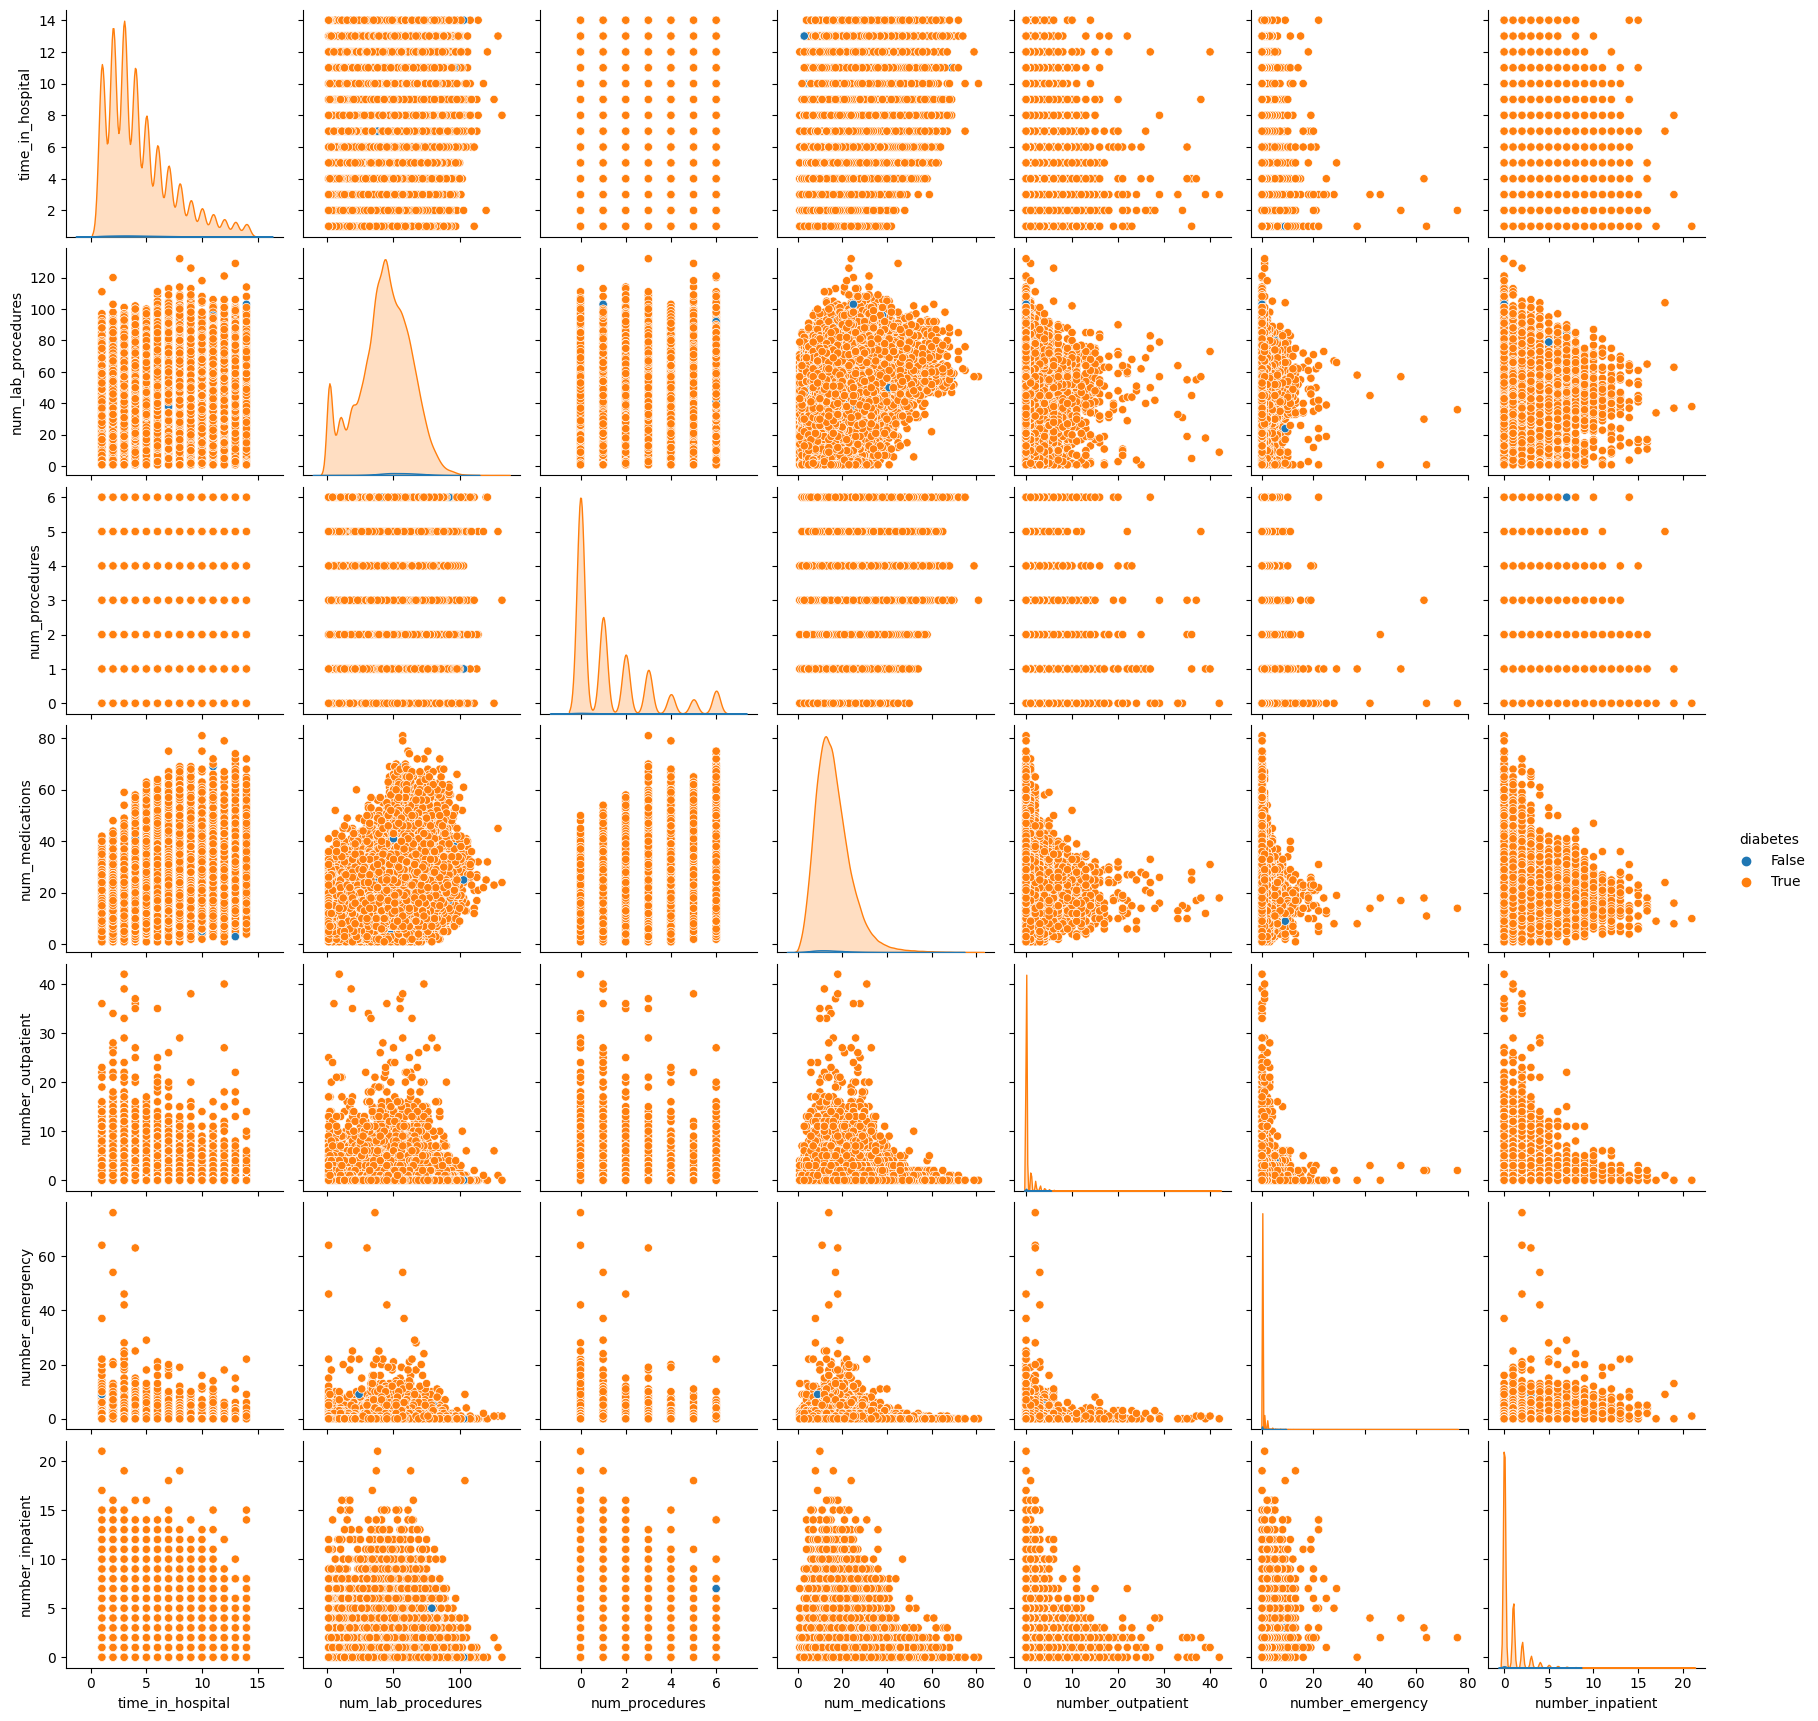

In [28]:
# Pair plots for numerical features in the dataset
numerical_features = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient']
sns.pairplot(df[numerical_features + ['diabetes']], hue='diabetes')
plt.show()

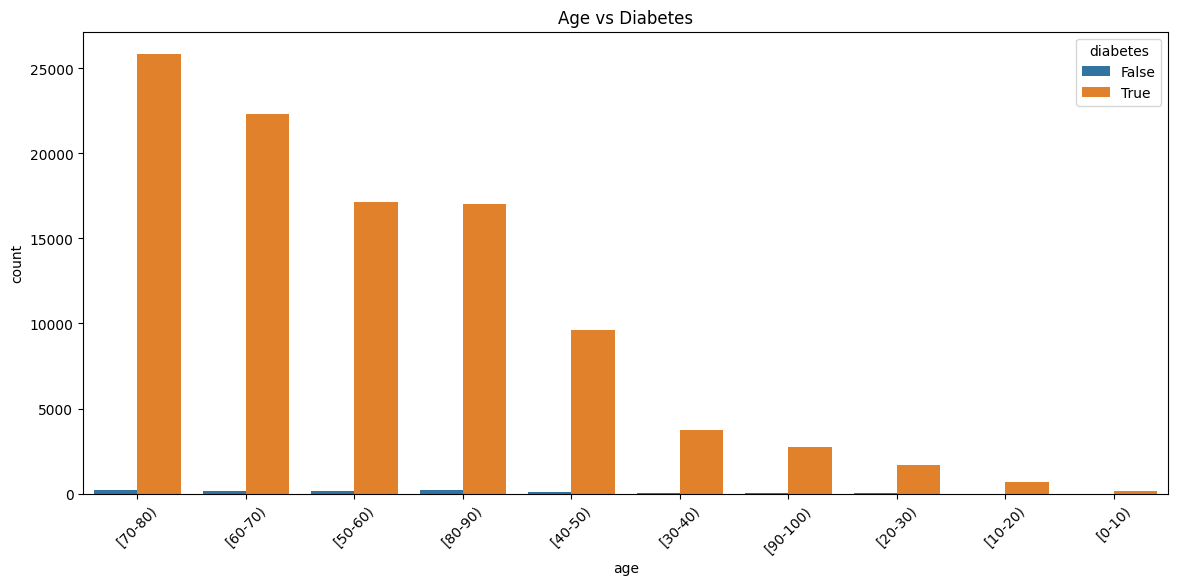

In [29]:
# Interaction between 'age' and 'diabetes'
plt.figure(figsize=(14, 6))
sns.countplot(x='age', hue='diabetes', data=df, order=df['age'].value_counts().index)
plt.title('Age vs Diabetes')
plt.xticks(rotation=45)
plt.show()

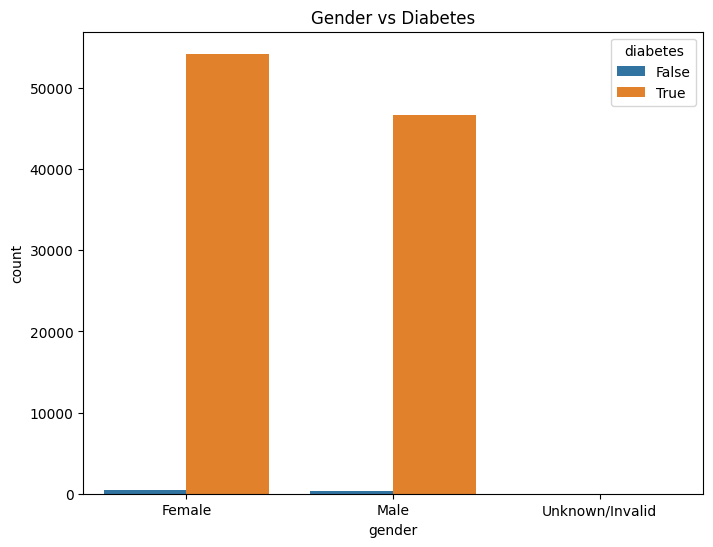

In [30]:
# Interaction between 'gender' and 'diabetes'
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='diabetes', data=df)
plt.title('Gender vs Diabetes')
plt.show()

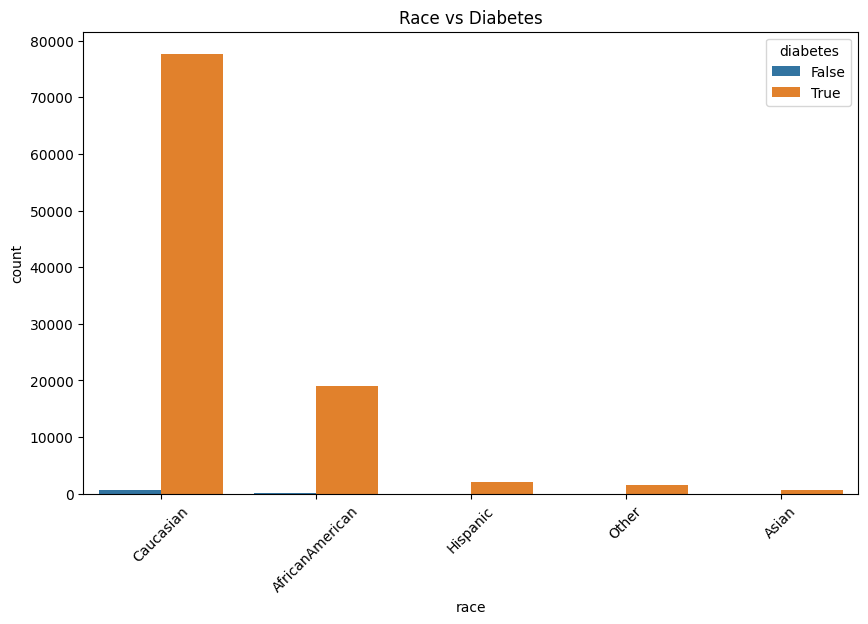

In [21]:
# Interaction between 'race' and 'diabetes'
plt.figure(figsize=(10, 6))
sns.countplot(x='race', hue='diabetes', data=df, order=df['race'].value_counts().index)
plt.title('Race vs Diabetes')
plt.xticks(rotation=45)
plt.show()

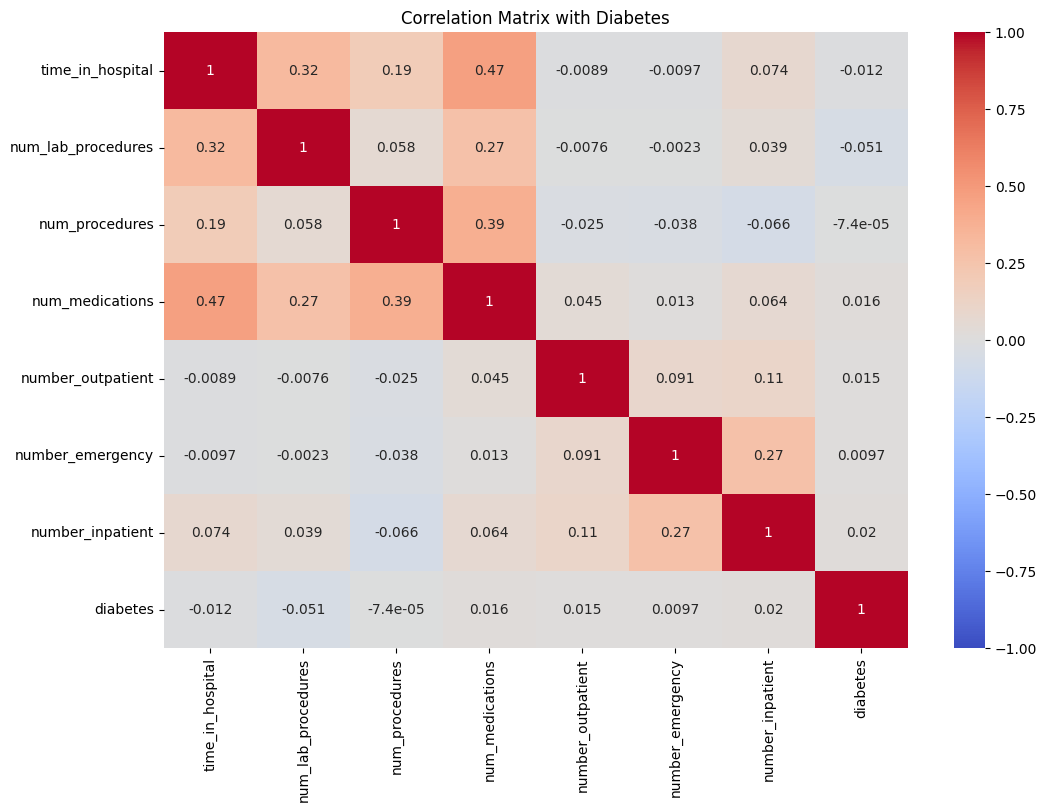

In [32]:
# Correlation matrix with target variable
corr_matrix = df[numerical_features + ['diabetes']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix with Diabetes')
plt.show()

Preprocessing and Splitting 

Used Standard Scaler for the outliers, 
Onehot Encoder for the Categorical Features

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



# Define features and target
X = df_resampled.drop(columns=['diabetes'])  
y = df_resampled['diabetes']

# Identify categorical and numerical columns
categorical_cols = [col for col in X.columns if df[col].dtype == 'object']
numerical_cols = [col for col in X.columns if df[col].dtype in ['int64', 'float64']]

# Create a pipeline for preprocessing
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Now X_train_preprocessed and X_test_preprocessed should be numeric and ready for modeling
print(X_train_preprocessed.shape)
print(X_test_preprocessed.shape)
print(y_train.shape)
print(y_test.shape)


(161451, 2284)
(40363, 2284)
(161451,)
(40363,)


Using Random Forest for Feature Selection

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model with class weights
model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Train the model
model.fit(X_train_preprocessed, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [24]:
from sklearn.metrics import classification_report, roc_auc_score


y_pred = model.predict(X_test_preprocessed)
print(classification_report(y_test, y_pred))

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_preprocessed)[:,1])
print(f'ROC AUC Score: {roc_auc}')


              precision    recall  f1-score   support

       False       1.00      1.00      1.00     20319
        True       1.00      1.00      1.00     20044

    accuracy                           1.00     40363
   macro avg       1.00      1.00      1.00     40363
weighted avg       1.00      1.00      1.00     40363

ROC AUC Score: 1.0


Feature Selection

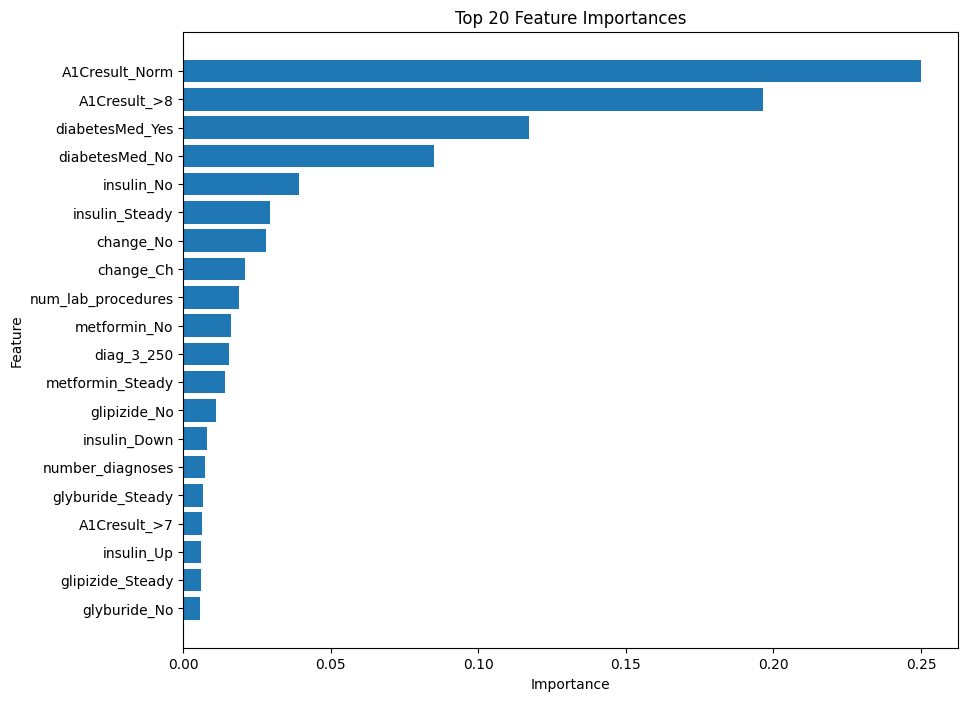

              Feature  Importance
0      A1Cresult_Norm    0.250180
1        A1Cresult_>8    0.196405
2     diabetesMed_Yes    0.117268
3      diabetesMed_No    0.085082
4          insulin_No    0.039260
...               ...         ...
2279       diag_2_727    0.000000
2280       diag_2_725    0.000000
2281       diag_2_717    0.000000
2282       diag_2_712    0.000000
2283       diag_2_656    0.000000

[2284 rows x 2 columns]


In [25]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Initialize Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf.fit(X_train_preprocessed, y_train)

# Get feature importances
feature_importances = rf.feature_importances_

# Match feature importances with column names
columns = numerical_cols + list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_cols))

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': columns, 'Importance': feature_importances})

# Sort the DataFrame based on feature importance
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Plotting feature importances
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'][:20], importance_df['Importance'][:20])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()


print(importance_df)


Preprocessed Shape

In [26]:
print(X_train_preprocessed.shape)
print(X_test_preprocessed.shape)


(161451, 2284)
(40363, 2284)


Display the Normalized Features

In [27]:
# List of numerical features
numerical_features = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 
                      'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient']

# Separate numerical features
numerical_df = df[numerical_features]

# Normalize numerical features
scaler = StandardScaler()
normalized_numerical_df = pd.DataFrame(scaler.fit_transform(numerical_df), columns=numerical_features)

# Verify the normalization
print("\nNormalized Numerical Features:\n")
print(normalized_numerical_df.head())




Normalized Numerical Features:

   time_in_hospital  num_lab_procedures  num_procedures  num_medications   
0         -1.137649           -0.106517       -0.785398        -1.848268  \
1         -0.467653            0.808384       -0.785398         0.243390   
2         -0.802651           -1.631351        2.145781        -0.371804   
3         -0.802651            0.045967       -0.199162        -0.002688   
4         -1.137649            0.401761       -0.785398        -0.986997   

   number_outpatient  number_emergency  number_inpatient  
0          -0.291461          -0.21262         -0.503276  
1          -0.291461          -0.21262         -0.503276  
2           1.286748          -0.21262          0.288579  
3          -0.291461          -0.21262         -0.503276  
4          -0.291461          -0.21262         -0.503276  


Random Forest Training

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Select the top features
selected_features = ['diabetesMed_Yes', 'diabetesMed_No', 'diag_3_250', 'insulin_No', 
                     'insulin_Steady', 'change_No', 'change_Ch', 'diag_2_250', 
                     'number_diagnoses', 'metformin_No', 'encounter_id', 
                     'metformin_Steady', 'patient_nbr']

# Filter the preprocessed training and test data to include only these features
X_train_selected = X_train_preprocessed[:, [columns.index(feature) for feature in selected_features]]
X_test_selected = X_test_preprocessed[:, [columns.index(feature) for feature in selected_features]]

# Initialize Random Forest classifier
rf_selected = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)

# Fit the model to the training data
rf_selected.fit(X_train_selected, y_train)

# Predict on the test data
y_pred = rf_selected.predict(X_test_selected)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report for more detailed evaluation metrics
print(classification_report(y_test, y_pred))


Accuracy: 1.00
              precision    recall  f1-score   support

       False       0.99      1.00      1.00     20319
        True       1.00      0.99      1.00     20044

    accuracy                           1.00     40363
   macro avg       1.00      1.00      1.00     40363
weighted avg       1.00      1.00      1.00     40363



Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Select the top features
selected_features = ['diabetesMed_Yes', 'diabetesMed_No', 'diag_3_250', 'insulin_No', 
                     'insulin_Steady', 'change_No', 'change_Ch', 'diag_2_250', 
                     'number_diagnoses', 'metformin_No', 'encounter_id', 
                     'metformin_Steady', 'patient_nbr']

# Filter the preprocessed training and test data to include only these features
X_train_selected = X_train_preprocessed[:, [columns.index(feature) for feature in selected_features]]
X_test_selected = X_test_preprocessed[:, [columns.index(feature) for feature in selected_features]]

# Initialize Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model to the training data
logreg.fit(X_train_selected, y_train)

# Predict on the test data
y_pred = logreg.predict(X_test_selected)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report for more detailed evaluation metrics
print(classification_report(y_test, y_pred))


Accuracy: 0.91
              precision    recall  f1-score   support

       False       0.85      1.00      0.92     20319
        True       1.00      0.82      0.90     20044

    accuracy                           0.91     40363
   macro avg       0.93      0.91      0.91     40363
weighted avg       0.92      0.91      0.91     40363



Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Select the top features
selected_features = ['diabetesMed_Yes', 'diabetesMed_No', 'diag_3_250', 'insulin_No', 
                     'insulin_Steady', 'change_No', 'change_Ch', 'diag_2_250', 
                     'number_diagnoses', 'metformin_No', 'encounter_id', 
                     'metformin_Steady', 'patient_nbr']

# Filter the preprocessed training and test data to include only these features
X_train_selected = X_train_preprocessed[:, [columns.index(feature) for feature in selected_features]]
X_test_selected = X_test_preprocessed[:, [columns.index(feature) for feature in selected_features]]

# Initialize Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
dt.fit(X_train_selected, y_train)

# Predict on the test data
y_pred = dt.predict(X_test_selected)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report for more detailed evaluation metrics
print(classification_report(y_test, y_pred))


Accuracy: 1.00
              precision    recall  f1-score   support

       False       0.99      1.00      1.00     20319
        True       1.00      0.99      0.99     20044

    accuracy                           1.00     40363
   macro avg       1.00      0.99      1.00     40363
weighted avg       1.00      1.00      1.00     40363



SVM

In [31]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Select the top features
selected_features = ['diabetesMed_Yes', 'diabetesMed_No', 'diag_3_250', 'insulin_No', 
                     'insulin_Steady', 'change_No', 'change_Ch', 'diag_2_250', 
                     'number_diagnoses', 'metformin_No', 'encounter_id', 
                     'metformin_Steady', 'patient_nbr']

# Filter the preprocessed training and test data to include only these features
X_train_selected = X_train_preprocessed[:, [columns.index(feature) for feature in selected_features]]
X_test_selected = X_test_preprocessed[:, [columns.index(feature) for feature in selected_features]]

# Initialize SVM classifier
svm = SVC(kernel='rbf', random_state=42)  # Using RBF kernel for non-linear decision boundaries

# Fit the model to the training data
svm.fit(X_train_selected, y_train)

# Predict on the test data
y_pred = svm.predict(X_test_selected)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report for more detailed evaluation metrics
print(classification_report(y_test, y_pred))


Accuracy: 0.91
              precision    recall  f1-score   support

       False       0.85      1.00      0.92     20319
        True       1.00      0.82      0.90     20044

    accuracy                           0.91     40363
   macro avg       0.93      0.91      0.91     40363
weighted avg       0.92      0.91      0.91     40363



Ensemble Method ( Voting Classifier)

In [32]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


# Initialize individual models
rf = RandomForestClassifier(n_estimators=100, random_state=42)
logreg = LogisticRegression(max_iter=1000, random_state=42)
dt = DecisionTreeClassifier(random_state=42)
svm = SVC(kernel='rbf', random_state=42)


# Create a list of tuples with each model
estimators = [('rf', rf), ('logreg', logreg), ('dt', dt), ('svm', svm)]

# Initialize VotingClassifier with hard voting (simple majority voting)
voting_clf = VotingClassifier(estimators=estimators, voting='hard')


# Fit the VotingClassifier on the training data
voting_clf.fit(X_train_selected, y_train)

# Predict on the test data
y_pred = voting_clf.predict(X_test_selected)

# Evaluate the ensemble model
accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble Accuracy: {accuracy:.2f}")

# Print classification report for more detailed evaluation metrics
print(classification_report(y_test, y_pred))


Ensemble Accuracy: 0.91
              precision    recall  f1-score   support

       False       0.85      1.00      0.92     20319
        True       1.00      0.82      0.90     20044

    accuracy                           0.91     40363
   macro avg       0.93      0.91      0.91     40363
weighted avg       0.92      0.91      0.91     40363



Multilayer Perceptron (MLP) classifier. Neural Network

In [34]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialize the Neural Network classifier
nn_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)

# Train the classifier on the training data
nn_classifier.fit(X_train_selected, y_train)

# Make predictions on the test data
y_pred_nn = nn_classifier.predict(X_test_selected)

# Evaluate the classifier
accuracy_nn = accuracy_score(y_test, y_pred_nn)
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
report_nn = classification_report(y_test, y_pred_nn)

print(f"Neural Network Accuracy: {accuracy_nn}")
print(f"Classification Report:\n{report_nn}")


Neural Network Accuracy: 0.9150459579317692
Classification Report:
              precision    recall  f1-score   support

       False       0.86      1.00      0.92     20319
        True       1.00      0.83      0.91     20044

    accuracy                           0.92     40363
   macro avg       0.93      0.91      0.91     40363
weighted avg       0.93      0.92      0.91     40363



Evaluate Models

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define features and target
X = df_resampled.drop(columns=['diabetes'])  
y = df_resampled['diabetes']

# Identify categorical and numerical columns
categorical_cols = [col for col in X.columns if df[col].dtype == 'object']
numerical_cols = [col for col in X.columns if df[col].dtype in ['int64', 'float64']]

# Create a pipeline for preprocessing
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)


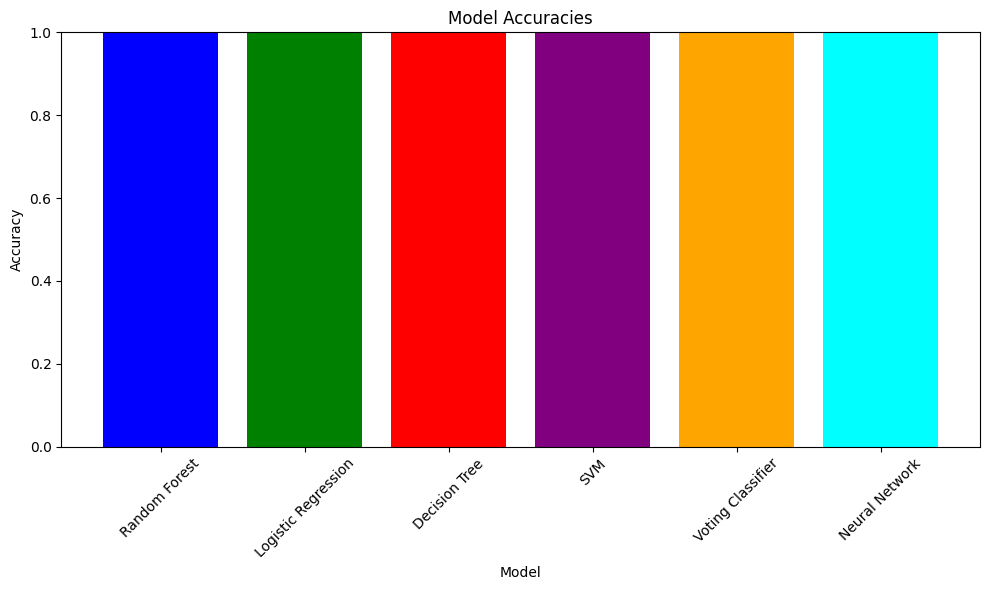

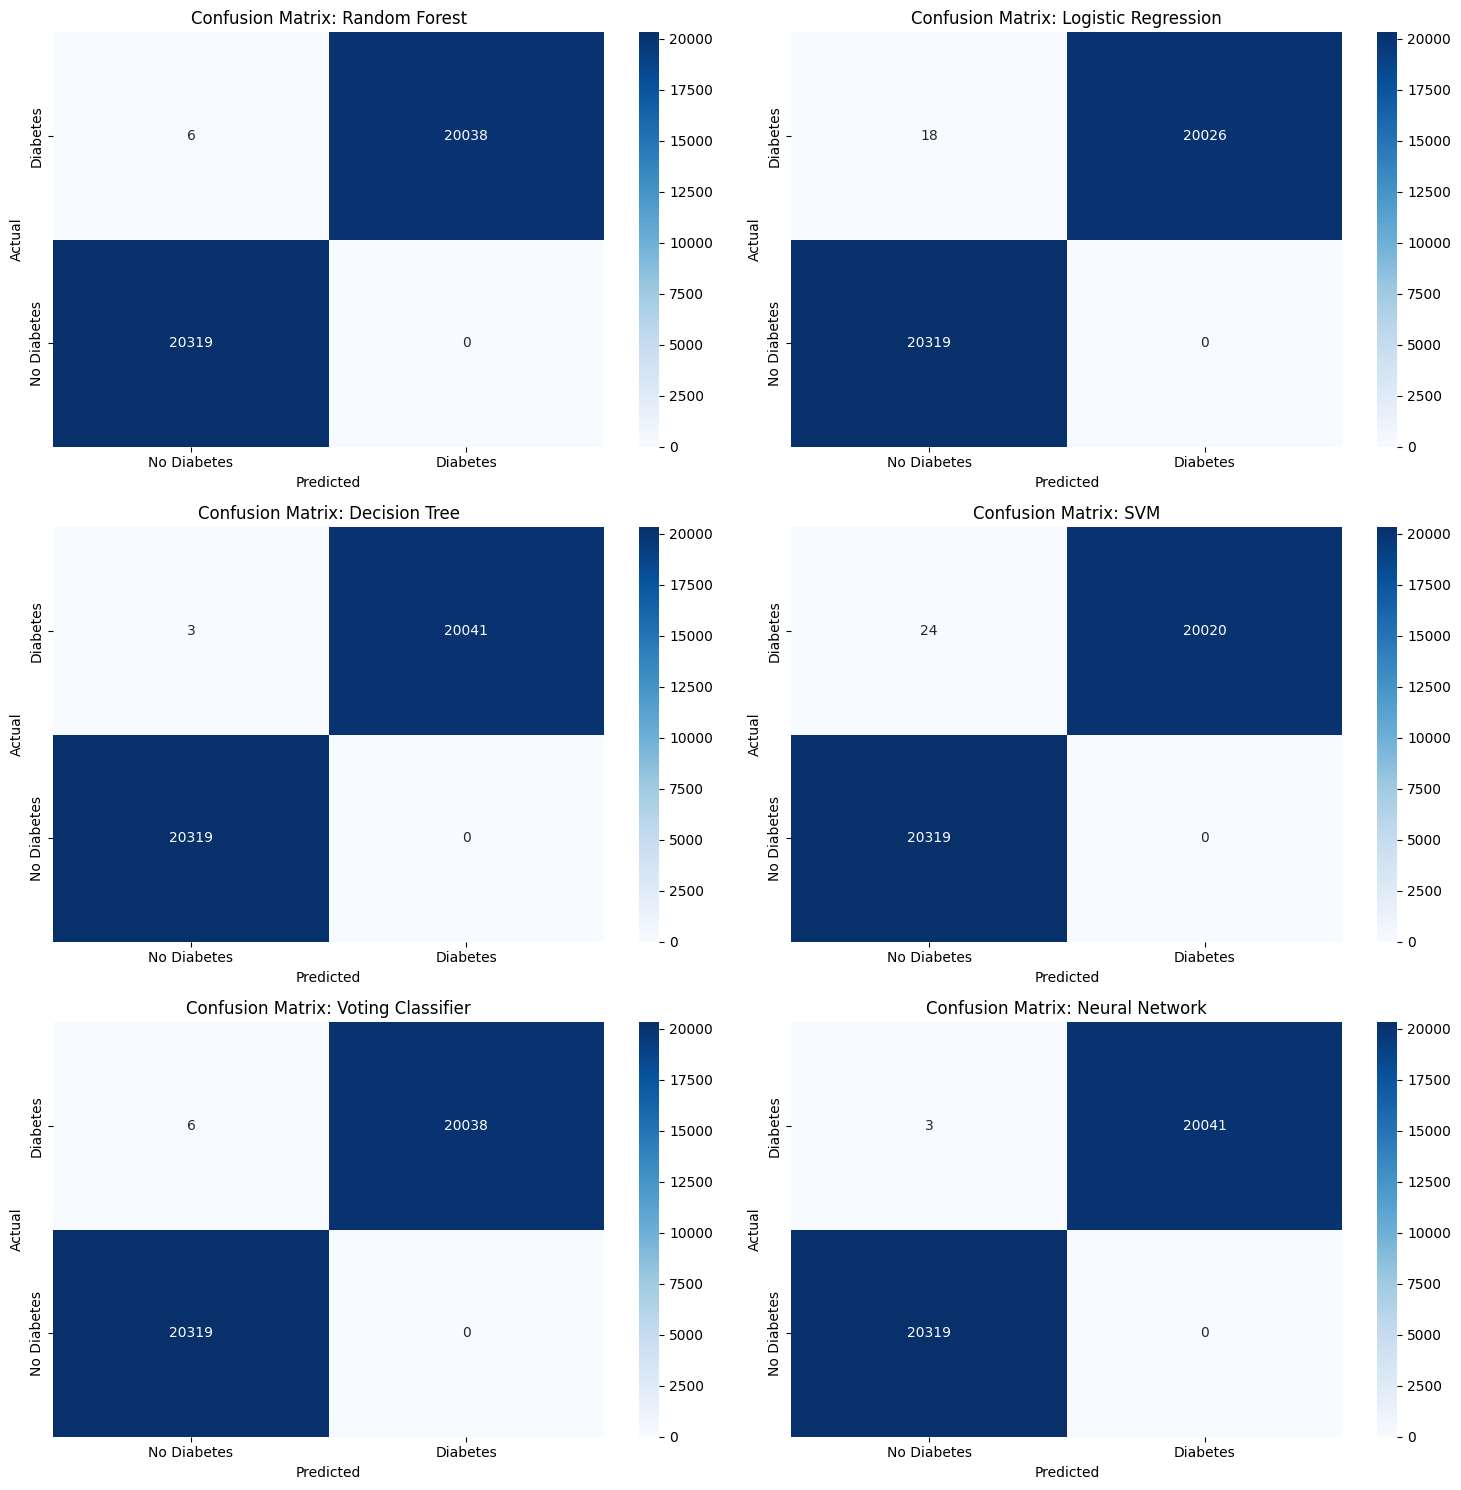

In [43]:
# Initialize classifiers inside a loop
classifiers = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True),
    'Voting Classifier': VotingClassifier(estimators=[
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
        ('lr', LogisticRegression(random_state=42, max_iter=1000)),
        ('dt', DecisionTreeClassifier(random_state=42)),
        ('svm', SVC(random_state=42, probability=True))
    ], voting='soft'),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
}

accuracies = {}
confusion_matrices = {}

# Train and evaluate each classifier on encoded data
for name, clf in classifiers.items():
    clf.fit(X_train_preprocessed, y_train)  # Use preprocessed data
    y_pred = clf.predict(X_test_preprocessed)
    accuracies[name] = accuracy_score(y_test, y_pred)
    confusion_matrices[name] = confusion_matrix(y_test, y_pred)

# Plot accuracies
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'red', 'purple', 'orange', 'cyan'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.ylim([0, 1])  
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

# Plot confusion matrices
fig, axes = plt.subplots((len(confusion_matrices) + 1) // 2, 2, figsize=(15, 15))
axes = axes.flatten()
for i, (name, cm) in enumerate(confusion_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'Confusion Matrix: {name}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')
    axes[i].set_xticklabels(['No Diabetes', 'Diabetes'])  
    axes[i].set_yticklabels(['No Diabetes', 'Diabetes'])  
    axes[i].set_ylim([0, 2]) 
    axes[i].grid(False)  
plt.tight_layout()
plt.show()



In [37]:
print(confusion_matrices)

{'Random Forest': array([[  147,    13],
       [   19, 20175]]), 'Logistic Regression': array([[  159,     1],
       [   17, 20177]]), 'Decision Tree': array([[  159,     1],
       [    6, 20188]]), 'SVM': array([[  159,     1],
       [   30, 20164]]), 'Voting Classifier': array([[  158,     2],
       [   12, 20182]]), 'Neural Network': array([[  159,     1],
       [    8, 20186]])}
